# PART I:
### EDA & Data Preprocessing on Google App Store Rating Dataset.
### Domain: Mobile device apps
### Context:

*The Play Store apps data has enormous potential to drive app-making businesses to success. However, many
apps are being developed every single day and only a few of them become profitable. It is important for
developers to be able to predict the success of their app and incorporate features which makes an app
successful. Before any such predictive-study can be done, it is necessary to do EDA and data-preprocessing on
the apps data available for google app store applications. From the collected apps data and user ratings from
the app stores, let's try to extract insightful information.*

### Objective:

*The Goal is to explore the data and pre-process it for future use in any predictive analytics study.*


### 1. Import required libraries and read the dataset.

In [1]:
import pandas as pd
import numpy as np



df = pd.read_csv('Apps_data+(1).csv')

### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [2]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.shape

(10841, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [86]:
for i in df.columns:
    value_counts = df[i].value_counts()
    
    print(f"column:{i}")
    print(value_counts)
    print('-'*55)

column:Category
Category
FAMILY                 1569
GAME                    956
TOOLS                   564
LIFESTYLE               265
MEDICAL                 264
FINANCE                 257
PERSONALIZATION         255
SPORTS                  231
PHOTOGRAPHY             223
BUSINESS                217
PRODUCTIVITY            214
HEALTH_AND_FITNESS      196
COMMUNICATION           181
SOCIAL                  168
NEWS_AND_MAGAZINES      160
SHOPPING                153
TRAVEL_AND_LOCAL        146
DATING                  141
BOOKS_AND_REFERENCE     140
VIDEO_PLAYERS           112
MAPS_AND_NAVIGATION      93
EDUCATION                93
FOOD_AND_DRINK           82
ENTERTAINMENT            67
AUTO_AND_VEHICLES        62
ART_AND_DESIGN           59
HOUSE_AND_HOME           50
WEATHER                  50
COMICS                   47
PARENTING                44
EVENTS                   37
BEAUTY                   37
LIBRARIES_AND_DEMO       34
Name: count, dtype: int64
-------------------------

### 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
df.describe(include='object')

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


### 4. Check if there are any duplicate records in the dataset? if any drop them

In [8]:
df.duplicated().sum()

483

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

### 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them

In [11]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [12]:
invalid_categories = ['1.9'] 
df = df[~df['Category'].isin(invalid_categories)]

In [13]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

### 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [14]:
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [15]:
df = df.dropna(subset=['Rating'])

In [16]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

In [17]:
df['Rating_category'] = df['Rating'].apply(lambda x: 'High' if x > 3.5 else 'Low')

In [18]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


### 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

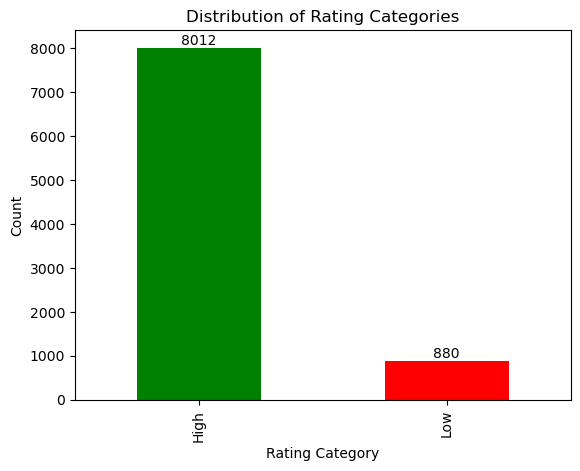

In [19]:
import matplotlib.pyplot as plt

rating_category_distribution = df['Rating_category'].value_counts()


ax=rating_category_distribution.plot(kind='bar', color=['green', 'red'])

plt.bar_label(ax.containers[0])

plt.title('Distribution of Rating Categories')

plt.xlabel('Rating Category')

plt.ylabel('Count')

plt.show()





**In the rating category the frequency for high is 8012 i.e here high is >3.5 rating where as low is having only 880**

### 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [20]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8892 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              8892 non-null   object 
 1   Category         8892 non-null   object 
 2   Rating           8892 non-null   float64
 3   Reviews          8892 non-null   int64  
 4   Size             8892 non-null   object 
 5   Installs         8892 non-null   object 
 6   Type             8892 non-null   object 
 7   Price            8892 non-null   object 
 8   Content Rating   8892 non-null   object 
 9   Genres           8892 non-null   object 
 10  Last Updated     8892 non-null   object 
 11  Current Ver      8888 non-null   object 
 12  Android Ver      8890 non-null   object 
 13  Rating_category  8892 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.0+ MB


In [22]:
df['Reviews'].isnull().sum()

0

<Axes: xlabel='Reviews'>

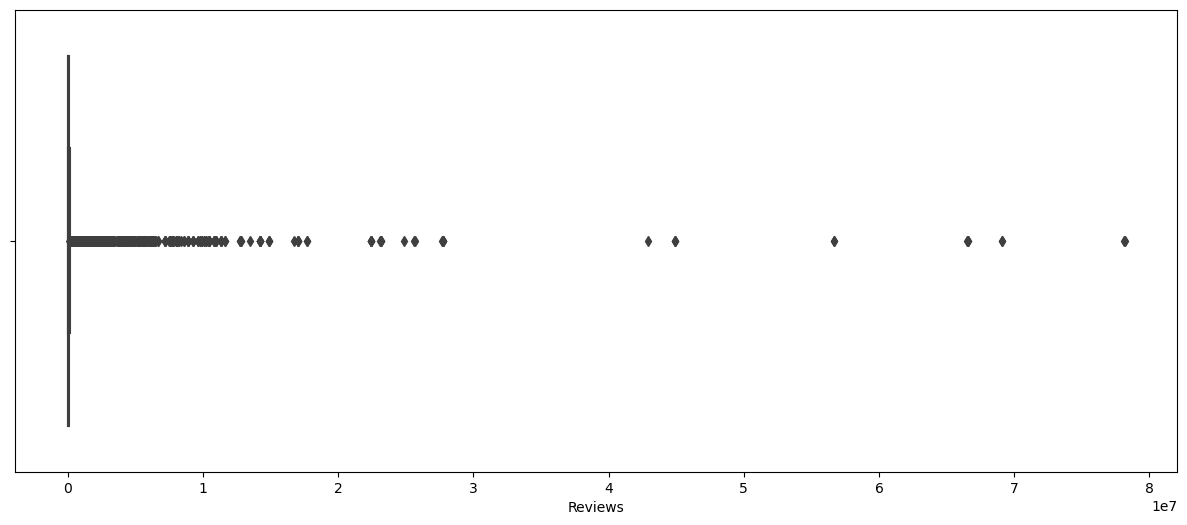

In [23]:
import seaborn as sns
plt.figure(figsize=(15,6))
sns.boxplot(data=df,x='Reviews')

In [24]:
df['Reviews_log'] = np.log1p(df['Reviews'])

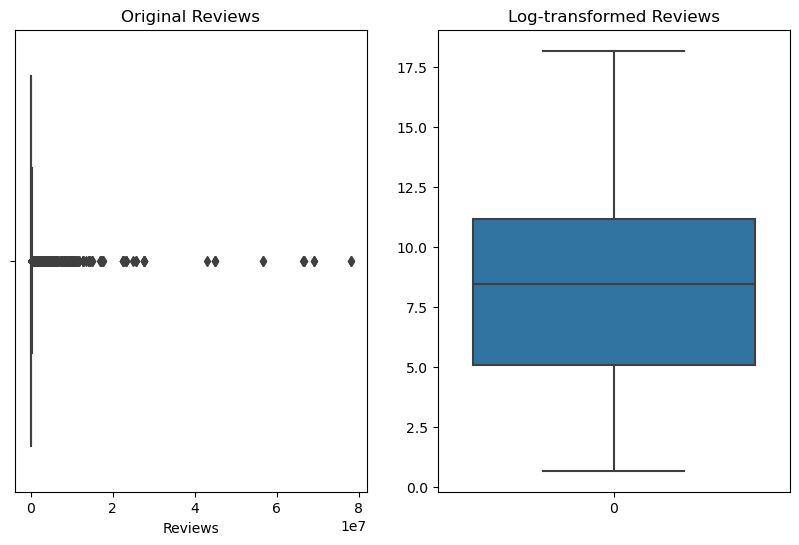

In [25]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df,x='Reviews')
plt.title('Original Reviews')

plt.subplot(1, 2, 2)
sns.boxplot(df['Reviews_log'])
plt.title('Log-transformed Reviews')

plt.show()

### 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')


In [26]:
df['Size'] = df['Size'].replace({'M': 'e6', 'K': 'e3'}, regex=True)

In [27]:
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

In [28]:
df['Size'].dtype

dtype('float64')

In [29]:
# Dropping entries where size='Varies with device'
df = df[df['Size'].notna()]

In [30]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category,Reviews_log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High,5.075174
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High,6.875232
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High,11.379520
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High,12.281389
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High,6.875232


### 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [31]:
# Remove unwanted characters
df['Installs'] = df['Installs'].str.replace(',', '')
df['Installs'] = df['Installs'].str.replace('+', '')


In [32]:
# Convert to numeric data type
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

print(df['Installs'].dtype)

int64


In [33]:
# Handling missing values if any
df['Installs'].fillna(0, inplace=True)

In [34]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category,Reviews_log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High,5.075174
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High,6.875232
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High,11.379520
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High,12.281389
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High,6.875232


### 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type

In [35]:
# Removing unwanted characters and converting to float
df['Price'] = df['Price'].str.replace('$', '').astype(float)

In [36]:
df['Price'].dtype

dtype('float64')

In [37]:
df['Price'].isnull().sum()

0

**there are no missing values in price**

In [38]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category,Reviews_log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High,5.075174
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High,6.875232
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High,11.379520
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High,12.281389
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High,6.875232


### 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated','Current Ver','Android Ver' columns since which are redundant for our analysis)

In [39]:
columns_to_drop = ['App', 'Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']

In [40]:
df = df.drop(columns=columns_to_drop, axis=1)

In [41]:
df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category,Reviews_log
0,ART_AND_DESIGN,159,19000000.0,10000,Free,0.0,Everyone,High,5.075174
1,ART_AND_DESIGN,967,14000000.0,500000,Free,0.0,Everyone,High,6.875232
2,ART_AND_DESIGN,87510,8700000.0,5000000,Free,0.0,Everyone,High,11.379520
3,ART_AND_DESIGN,215644,25000000.0,50000000,Free,0.0,Teen,High,12.281389
4,ART_AND_DESIGN,967,2800000.0,100000,Free,0.0,Everyone,High,6.875232


### 13. Encode the categorical columns.

In [42]:
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print('*'*45)

Category
FAMILY                 1569
GAME                    956
TOOLS                   564
LIFESTYLE               265
MEDICAL                 264
FINANCE                 257
PERSONALIZATION         255
SPORTS                  231
PHOTOGRAPHY             223
BUSINESS                217
PRODUCTIVITY            214
HEALTH_AND_FITNESS      196
COMMUNICATION           181
SOCIAL                  168
NEWS_AND_MAGAZINES      160
SHOPPING                153
TRAVEL_AND_LOCAL        146
DATING                  141
BOOKS_AND_REFERENCE     140
VIDEO_PLAYERS           112
MAPS_AND_NAVIGATION      93
EDUCATION                93
FOOD_AND_DRINK           82
ENTERTAINMENT            67
AUTO_AND_VEHICLES        62
ART_AND_DESIGN           59
HOUSE_AND_HOME           50
WEATHER                  50
COMICS                   47
PARENTING                44
EVENTS                   37
BEAUTY                   37
LIBRARIES_AND_DEMO       34
Name: count, dtype: int64
*****************************************

In [43]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Initializing encoders

label_encoder = LabelEncoder()

one_hot_encoder = OneHotEncoder(drop='first', sparse=False)

In [44]:
# Applying label encoding to 'Rating_category'

df['Rating_category'] = label_encoder.fit_transform(df['Rating_category'])

df['Type'] = label_encoder.fit_transform(df['Type'])

In [45]:
# Applying one-hot encoding to 'Category','Content Rating'
df_encoded = pd.get_dummies(df, columns=['Category', 'Content Rating'], drop_first=True)

In [46]:
df_encoded.head()

,Reviews,Size,Installs,Type,Price,Rating_category,Reviews_log,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,159,19000000.0,10000,0,0.0,0,5.075174,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,967,14000000.0,500000,0,0.0,0,6.875232,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,87510,8700000.0,5000000,0,0.0,0,11.379520,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,215644,25000000.0,50000000,0,0.0,0,12.281389,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,967,2800000.0,100000,0,0.0,0,6.875232,False,False,False,...,False,False,False,False,False,True,False,False,False,False


### 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [47]:
X = df_encoded.drop('Rating_category', axis=1) 

y = df_encoded['Rating_category']  


### 15. Split the dataset into train and test.

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)
print('encoded',df_encoded.shape)

X_train (5016, 43)
X_test (2151, 43)
y_train (5016,)
y_test (2151,)
encoded (7167, 44)


### 16. Standardize the data, so that the values are within a particular range.

In [64]:
from sklearn.preprocessing import StandardScaler


scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(df_encoded)
data_scaled

<IPython.core.display.Javascript object>

array([[3.51941011e-06, 1.81818182e-01, 9.99900001e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.15174061e-05, 1.31313131e-01, 4.99999000e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.94924088e-03, 7.77777778e-02, 4.99999900e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [8.24165660e-07, 5.25252525e-01, 4.99900000e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.68242427e-08, 2.62626263e-02, 9.90000001e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.87216560e-03, 1.81818182e-01, 9.99999901e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

# PART II:
### Data Visualization on Honey Production dataset using seaborn and matplotlib libraries.
### Domain: Food and agriculture
### Context:
*In 2006, a global concern was raised over the rapid decline in the honeybee population, an integral component
to American honey agriculture. Large numbers of hives were lost to “Colony-Collapse-Disorder”, a
phenomenon of disappearing “worker-bees” causing the remaining “hive-colony” to collapse. Speculation
around the cause of this disorder points to hive-diseases and pesticides harming the pollinators, though no
overall consensus has been reached. Twelve years later, some industries are observing recovery but the
American honey industry is still largely struggling. The U.S. used to locally produce over half the honey it
consumes per year. Now, honey mostly comes from overseas, with 350 of the 400 million pounds of honey
consumed every year originating from imports. This dataset provides insight into honey production supply and
demand in America by state from 1998 to 2012.*
### Objective:
The Goal is to use Python visualization libraries such as seaborn and matplotlib to investigate the data and get
some useful conclusions

### 1. Import required libraries and read the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df1 = pd.read_csv('honeyproduction1998-2016.csv')

### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [53]:
df1.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [54]:
df1.shape

(785, 8)

In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        785 non-null    object 
 1   numcol       785 non-null    float64
 2   yieldpercol  785 non-null    int64  
 3   totalprod    785 non-null    float64
 4   stocks       785 non-null    float64
 5   priceperlb   785 non-null    float64
 6   prodvalue    785 non-null    float64
 7   year         785 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 49.2+ KB


In [85]:
for i in df1.columns:
    value_counts = df1[i].value_counts()
    
    print(f"column:{i}")
    print(value_counts)
    print('-'*55)

column:state
state
Alabama           19
Montana           19
New Jersey        19
New York          19
North Carolina    19
North Dakota      19
Ohio              19
Oregon            19
Pennsylvania      19
South Dakota      19
Tennessee         19
Texas             19
Utah              19
Vermont           19
Virginia          19
Washington        19
West Virginia     19
Wisconsin         19
Wyoming           19
Arizona           19
Nebraska          19
Missouri          19
Iowa              19
Arkansas          19
California        19
Colorado          19
Florida           19
Georgia           19
Hawaii            19
Idaho             19
Illinois          19
Indiana           19
Kansas            19
Mississippi       19
Kentucky          19
Louisiana         19
Maine             19
Michigan          19
Minnesota         19
New Mexico        15
Nevada            11
Oklahoma           6
Maryland           6
South Carolina     6
Name: count, dtype: int64
-------------------------------

### 3. Display the percentage distribution of the data in each year using the pie chart

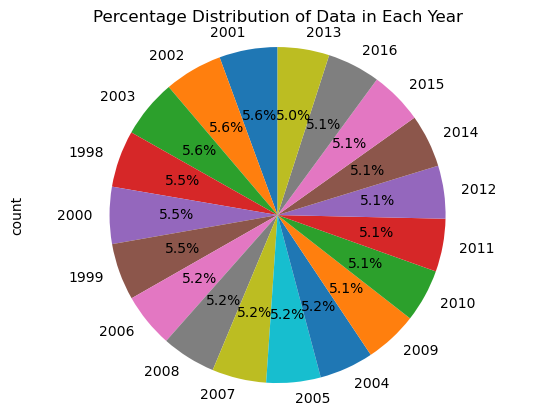

In [57]:
df1['year'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Percentage Distribution of Data in Each Year')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### 4. Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings.

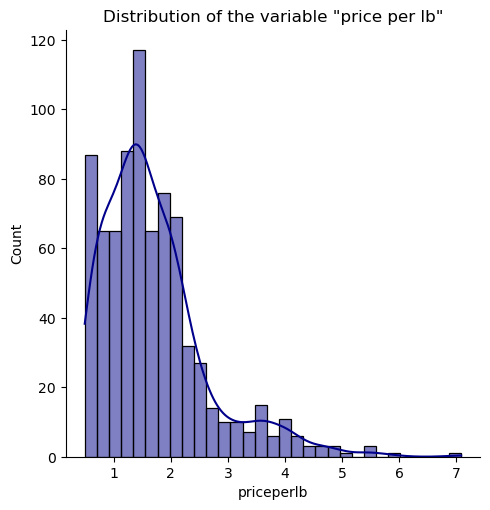

In [58]:
sns.displot(data=df1,x='priceperlb',kde=True,color='darkblue')
plt.title('Distribution of the variable "price per lb"')
plt.show()

* **Majority of the prices fall within 1-2 'price per lb' range**
* **As price increases the frequency of occurrence decreases i.e higher prices are less common**
* **The distribution is right skewed.**

### 5. Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and write your findings.


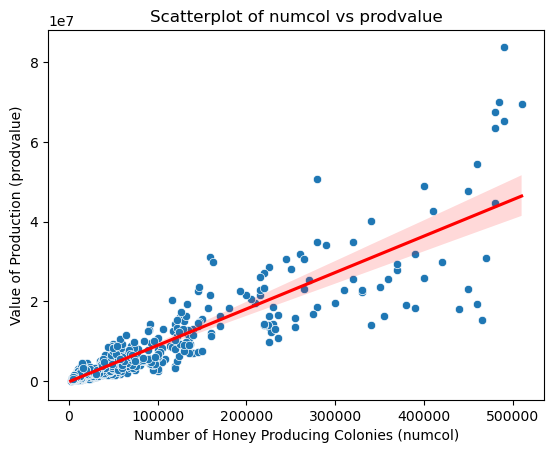

In [59]:
sns.scatterplot(data=df1, x='numcol', y='prodvalue')

sns.regplot(data=df1, x='numcol', y='prodvalue', scatter=False, color='red')

plt.title('Scatterplot of numcol vs prodvalue')

plt.xlabel('Number of Honey Producing Colonies (numcol)')

plt.ylabel('Value of Production (prodvalue)')

plt.show()


* **As the number of colonies increases, there is a positive correlation with the production values.**
* **It appears that production values tends to increase when you have greater number of colonies.**


### 6. Plot and understand the relationship between categorical variable 'year' and a numerical variable 'prodvalue' through boxplot, and write your findings.

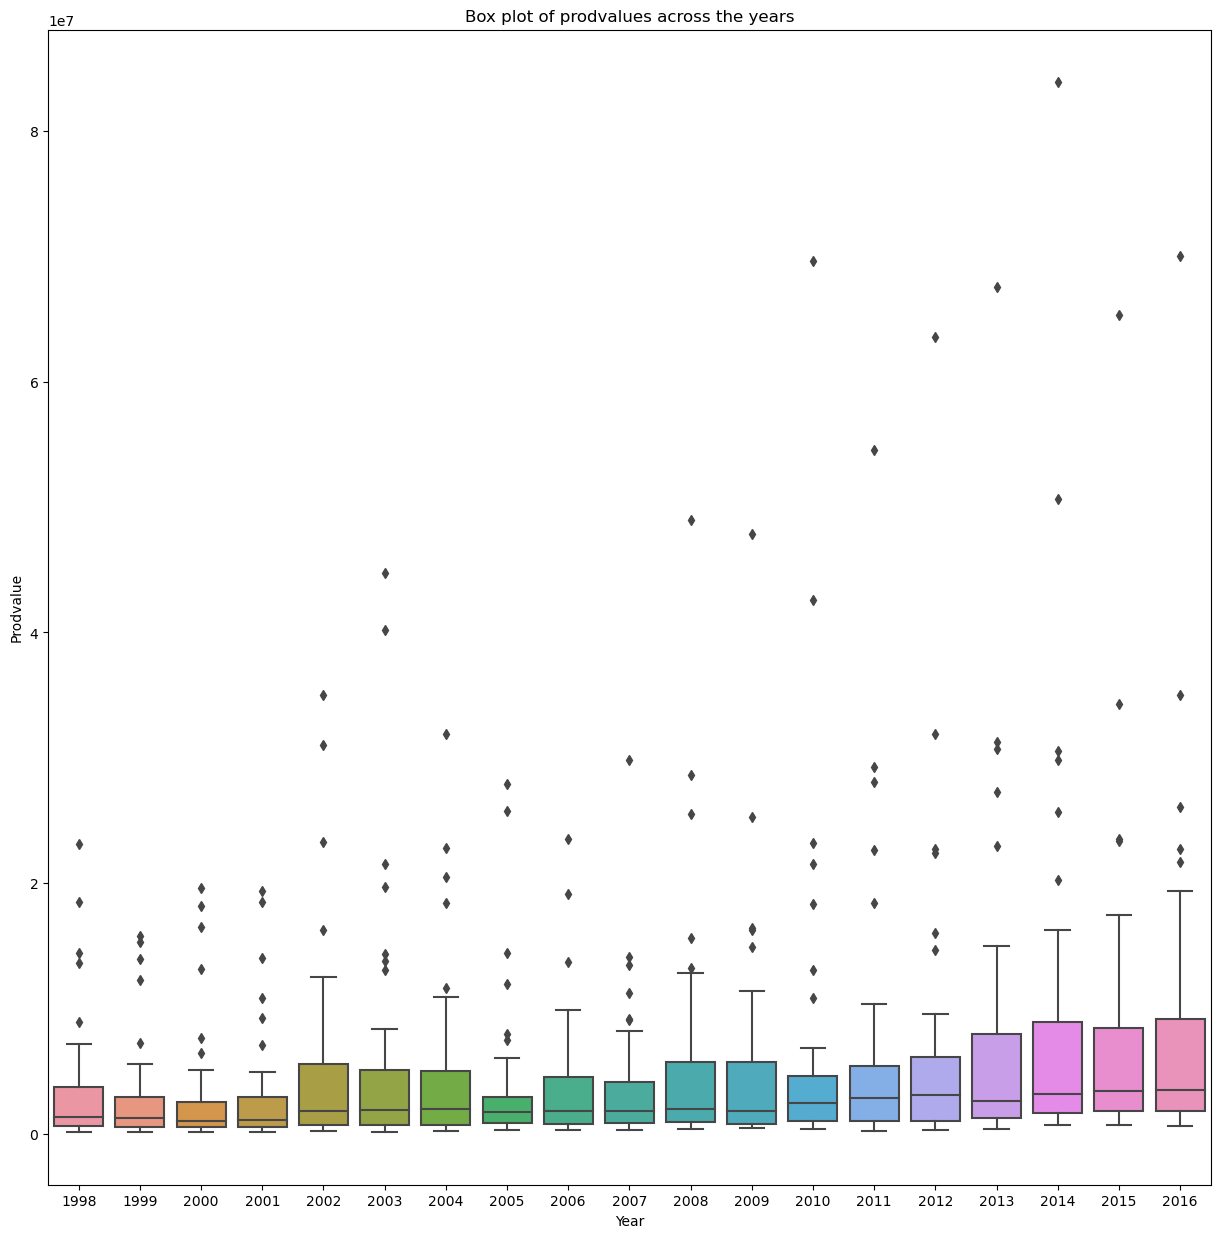

In [60]:
plt.figure(figsize=(15,15))

sns.boxplot(data=df1,x='year',y='prodvalue')

plt.title('Box plot of prodvalues across the years')

plt.xlabel('Year')

plt.ylabel('Prodvalue')

plt.show()

 **There seems to be general increase in median prodvalue over the years as indicated by the higher placements of line within the boxes.**

### 7. Visualize and understand the relationship between the multiple pairs of variables throughout different years using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')


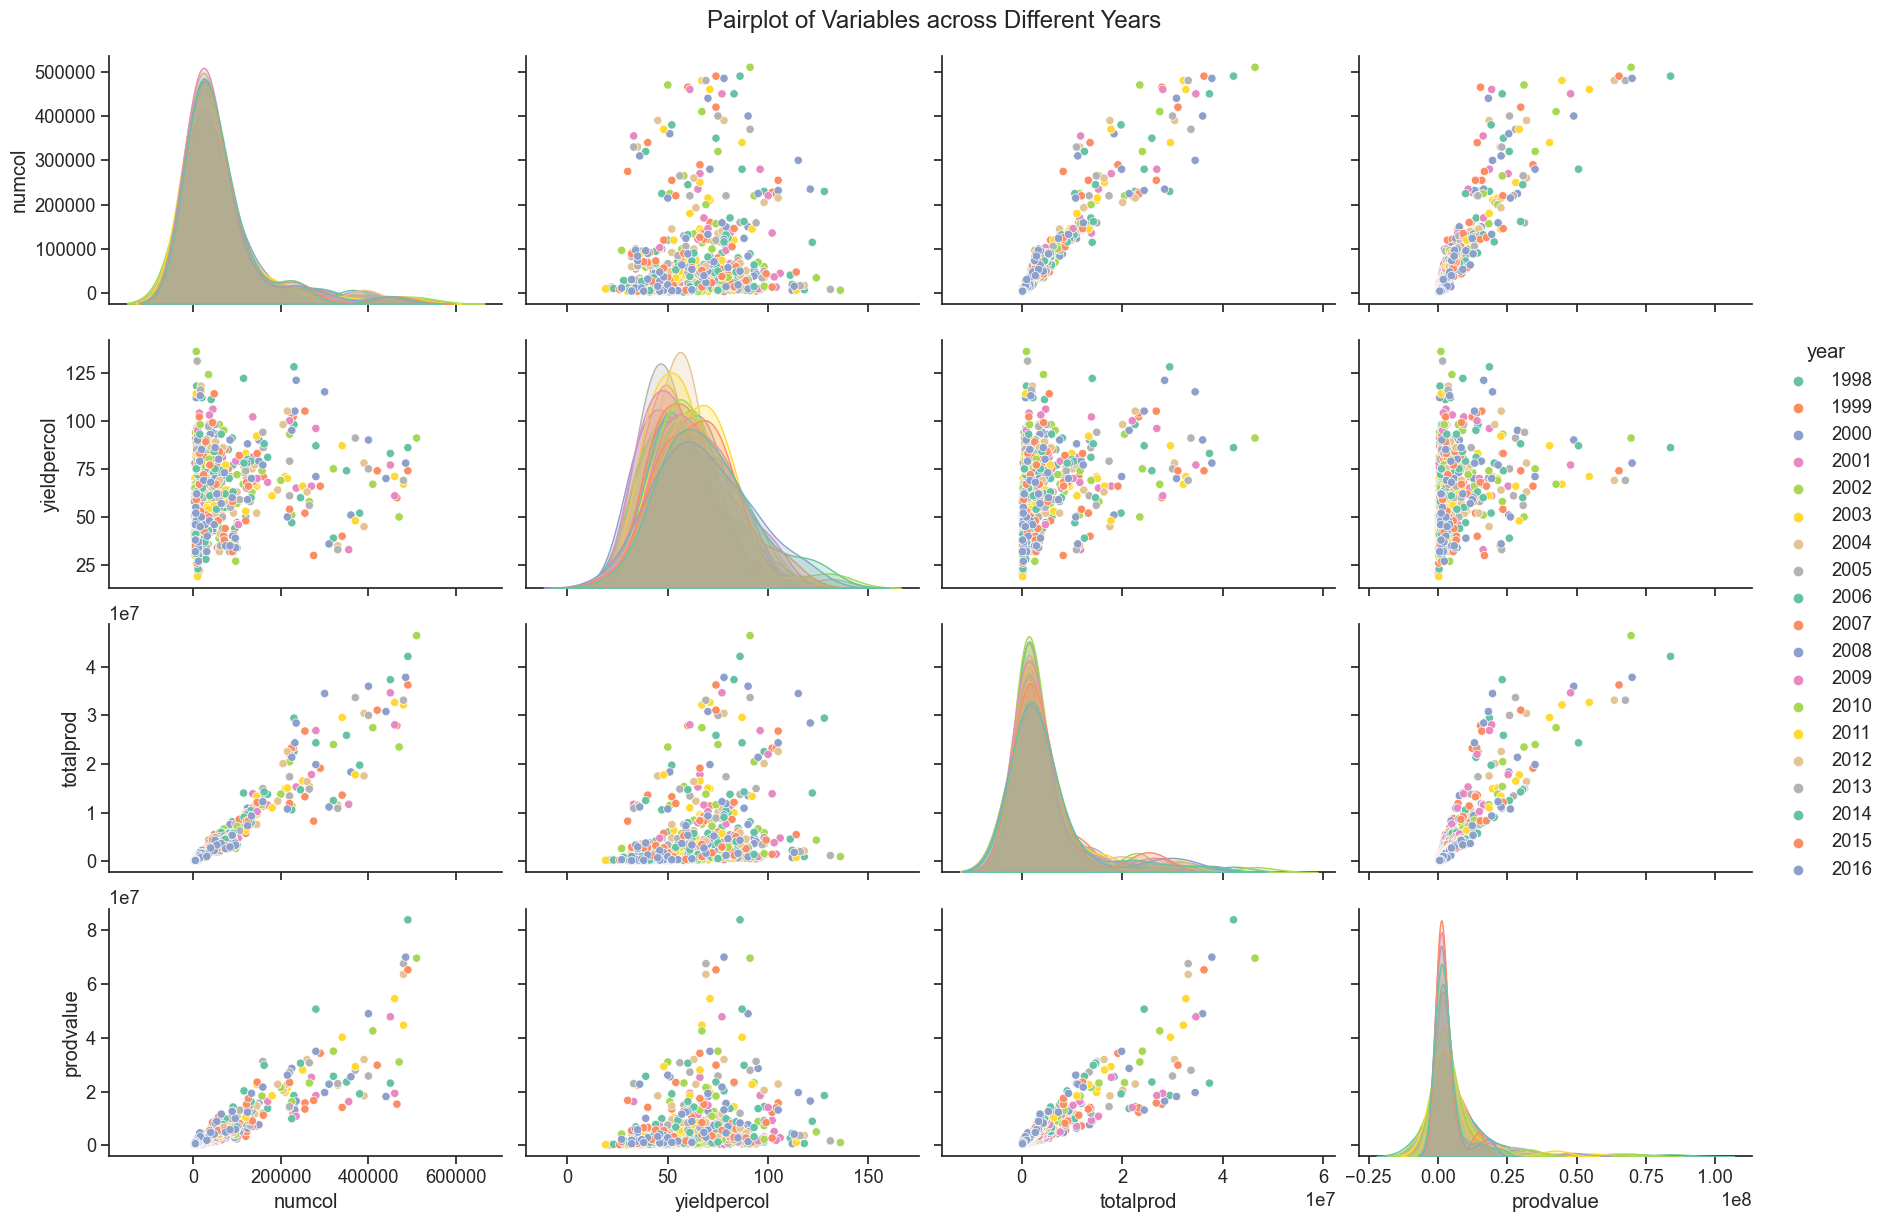

In [61]:
sns.set(style='ticks')
sns.set_context('notebook',font_scale=1.2)
sns.pairplot(df1[['numcol', 'yieldpercol', 'totalprod', 'prodvalue', 'year']],hue='year',palette='Set2',height=3,aspect=1.5)

plt.suptitle('Pairplot of Variables across Different Years', y=1.02)
plt.show()

### Inferences 
* **As total production  is increasing Production value also increasing** 
* **there is a negative correlation between 'yield per col' and 'prod value'.** 
* **This means that as 'yield per col' increases, 'prod value' tends to decrease.**
* **As number of colonies increases yield per col tends to decreases.**
* **Yield per col increases production value decreases.**

### 8. Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'stocks', 'price per lb', 'prodvalue')


In [4]:
col_to_correlate = ['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue']
corr_matrix = df1[col_to_correlate].corr()
corr_matrix

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
numcol,1.000000,0.224539,0.951822,0.820076,-0.211427,0.898989
yieldpercol,0.224539,1.000000,0.382945,0.358676,-0.360571,0.255789
totalprod,0.951822,0.382945,1.000000,0.876872,-0.239085,0.895242
stocks,0.820076,0.358676,0.876872,1.000000,-0.275926,0.713161
priceperlb,-0.211427,-0.360571,-0.239085,-0.275926,1.000000,-0.061833
prodvalue,0.898989,0.255789,0.895242,0.713161,-0.061833,1.000000


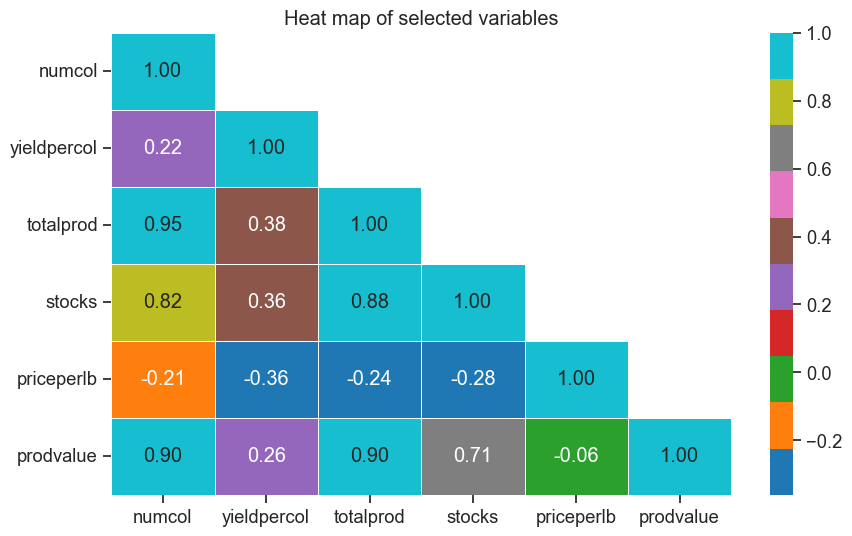

In [8]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set diagonal values of the mask to False
mask[np.diag_indices_from(mask)] = False

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='tab10', fmt='.2f', linewidths=.5)



plt.title('Heat map of selected variables')
plt.show()

### Inferences


* **Highest positive correlation between total prod and numcol i.e 0.95 that means as number of honey producing colonies increasing the total production also increasing.**

* **Highest negative correlation between priceperlb and yieldpercol i.e -0.36 that means yield per colony increases then priceperlb decreases.**
